<a href="https://colab.research.google.com/github/Kapoline/MathStatistics/blob/main/FirstPart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

n = 1348
m = 11
maxVal = 130194
minVal = 0
l = 11836
----------------
----------------
Выборочная средняя равна 6313.12
Выборочная дисперсия равна:  15536555.764896143
Ассиметрия: 0.48808864445684963
Эксцесс: -1.580326442844773
Коэффициент Стьюдента =  1.9617266928071218
Доверительный интервал для генерального среднего: ( 6102.513907991858 < 6523.726092008142 )
+------------------+---------+------------+------+-------------+------------------+
|    Интервалы     | Частота |   Xi mid   |  Wi  |      z      |       z^2        |
+------------------+---------+------------+------+-------------+------------------+
|    [0, 11836]    |  [1319] |  [5918.0]  | 0.98 |  [-395.12]  |   [156119.81]    |
|  [11836, 23672]  |   [22]  | [17754.0]  | 0.02 |  [11440.88] |  [130893735.17]  |
|  [23672, 35508]  |   [5]   | [29590.0]  | 0.0  |  [23276.88] |  [541813142.53]  |
|  [35508, 47344]  |   [1]   | [41426.0]  | 0.0  |  [35112.88] | [1232914341.89]  |
|  [47344, 59180]  |   [0]   | [53262.0]  | 0.0 

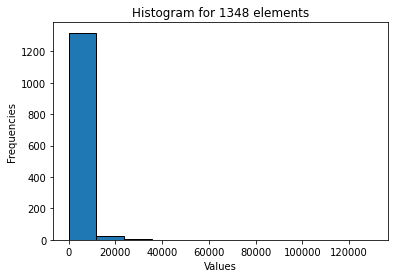

In [ ]:
from typing import List
from numpy import log10
import pandas as pd
import numpy as np
import math
import scipy.stats
import matplotlib.pyplot as plt
from tabulate import tabulate
import statistics as st
import statistics
from scipy.stats import t
from prettytable import PrettyTable
tbl = PrettyTable()


url = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/ig_users.csv"
table = pd.read_csv(url)

followers = table['F_FOLLOWERS_NOW']
n = table.shape[0]
print("n =", n)
m = math.floor(1+3.322*log10(n))
print("m =", m)

maxValue = followers.max()
print("maxVal =", maxValue)
minValue = followers.min()
print("minVal =", minValue)

l=math.ceil((maxValue-minValue)/m)
print("l =", math.ceil(l))


print("----------------")

followersArray = table['F_FOLLOWERS_NOW'].to_numpy()
#print(followersArray)


intervals = [[0 for x in range(2)] for y in range(m)]
for i in range(0, m):
    intervals[i][0] = minValue
    intervals[i][1] = minValue + l
    minValue = minValue + l
# print("Интервалы")
# for gap in intervals:
#   print(gap)

# print("----------------")

Ni = [[] for y in range(m)]
for i in range(0, m):
    x = 0
    for j in range(0, n):
        if (followers[j] < intervals[i][1] and followers[j] >= intervals[i][0]):
            x = x + 1
    Ni[i].append(x)
# print("Частота интервалов")
# print(Ni)

# print("----------------")

# print("Выборочная среднее:", round(st.mean(followers),2) 

# print("Выборочная дисперсия:", st.variance(followers, xbar=None))


# print("----------------")

middle = [[] for y in range(0, m)]
mid = 0
for i in range(0, m):
    mid = 0
    mid = (intervals[i][0] + intervals[i][1]) / 2
    middle[i].append(mid)
# print("Xi сер")
# print(middle)

print("----------------")

Wi = []
for i in range(0,m):
  wi = round(Ni[i][0]/n, 2)
  Wi.append(wi)
# print("WI массив")
# print(Wi)

xMiddle = 0
for i in range(0, m):
    xMiddle = xMiddle + (middle[i][0] * Ni[i][0])
xMiddle = round(xMiddle / n, 2)
print("Выборочная средняя равна", xMiddle)

#z^2
z = [[] for y in range(0, m)]
for i in range(0, m):
    zmid = 0.0
    zmid = round((middle[i][0] - xMiddle)**2, 2)
    z[i].append(zmid)

#z
z2 = [[] for y in range(0, m)]
for i in range(0, m):
    zval = round(middle[i][0] - xMiddle,2)
    z2[i].append(zval)

# print("----------------")
# print(z)

sigma = 0.0
for i in range(0, m):
    sigma = sigma + (z[i][0] * Ni[i][0])
sigma = sigma / n
print("Выборочная дисперсия равна: ", sigma)

sigma1 = math.sqrt(sigma)


z3 = [[] for y in range(0, m)]
for i in range(0, m):
    zmid = 0.0
    zmid = round((middle[i][0] - xMiddle)**3, 2)
    z3[i].append(zmid)

z4 = [[] for y in range(0, m)]
for i in range(0, m):
    zmid = 0.0
    zmid = round((middle[i][0] - xMiddle)**4, 2)
    z4[i].append(zmid)   

m3=0
for i in range(0, m):
  m3=m3+z3[i][0]*Wi[i]


m4 = 0
for i in range(0, m):
    m4 = m4 + z4[i][0]*Wi[i]
    

A3=m3/(sigma**(1.5))
print("Ассиметрия:", A3)

Ek=(m4/(sigma**(2)))-3
print("Эксцесс:", Ek)


k = n - 1 #степень свободы
gamma = 0.95 # надежность
gamma1 = 0.05

t = t.ppf(gamma+0.025, k) # ПОМЕНЯТЬ
print("Коэффициент Стьюдента = ", t)

genIntLeft = xMiddle - (math.sqrt(sigma) * t)/math.sqrt(n)
genIntRight = xMiddle + (math.sqrt(sigma) * t)/math.sqrt(n)
print( "Доверительный интервал для генерального среднего:" ,"(", genIntLeft, "<", genIntRight, ")")

tbl.add_column("Интервалы",intervals)
tbl.add_column("Частота", Ni)
tbl.add_column("Xi mid", middle)
tbl.add_column("Wi", Wi)
tbl.add_column("z", z2)
tbl.add_column("z^2", z)

print(tbl)

alfa1 = (1 - gamma)/2
alfa2 = (1 + gamma)/2
chi1 = scipy.stats.chi2.ppf(alfa1, k)
chi2 = scipy.stats.chi2.ppf(alfa2, k)
print("Xi1 =", round(chi1,3), "Xi2 =", round(chi2,2))

genDispLeft = round((n-1)*sigma/chi1 , 2)
genDispRight = round((n-1)*sigma/chi2, 2)
print( "Доверительный интервал для генеральной дисперсии:" ,"(", genDispRight, "<", genDispLeft, ")")

median = st.median(followers)
print("Медиана равна ", median)
mode = st.mode(followers)
print("Мода равна ", mode)

plt.hist(followers, edgecolor='black', bins=m)
plt.title('Histogram for ' + str(n) + ' elements')
plt.xlabel('Values')
plt.ylabel('Frequencies')
plt.show()











 












